# Sector rotation 

In [2]:
%load_ext autoreload
%autoreload 2
import sector_rot
import pandas as pd
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_dir = Path.cwd().parent/'data'

df_dict = {
    file.stem.replace("sector_","") : pd.read_parquet(file)
    for file in data_dir.glob("sector_*.parquet")
}

In [4]:
df_dict['60']

,vol,ret,shrout,prc,askhi,bidlo,put_volume,call_volume,put_call_ratio,vix_close,...,enhanced_baker,news_sent,mktcap,turn_sd,sect_mktcap,mvel1,dolvol,daily_illq,excess_ret,excess_mkt_ret
index,,,,,,,,,,,,,,,,,,,,,
1998-01-02,1.012911e+06,-0.007775,179827.681329,47.963598,48.737117,47.689114,4.536085,6.304128,0.747422,23.420000,...,2.396,0.27,8.706114e+06,5.419152,8.625183e+06,15.979536,4.858285e+07,0.000160,-0.007985,0.00199
1998-01-05,9.592534e+05,0.013037,179998.720045,48.598245,48.732605,47.982605,14.275352,177.119664,0.185778,24.360001,...,2.396,0.25,8.836628e+06,5.419152,8.747622e+06,15.994416,4.661803e+07,0.000280,0.012827,0.00199
1998-01-06,4.617979e+05,-0.003385,180127.460640,48.441417,48.962833,48.032472,1.000000,195.125329,0.006906,25.660000,...,2.396,0.25,8.819523e+06,5.419152,8.725629e+06,15.992478,2.237014e+07,0.000151,-0.003595,-0.01061
1998-01-07,6.444057e+05,-0.031611,179894.510745,46.895685,48.212892,46.417358,16.919431,16.919431,1.000000,25.070000,...,2.396,0.26,8.518060e+06,5.419152,8.436276e+06,15.957699,3.021985e+07,0.001046,-0.031821,-0.00401
1998-01-08,7.286107e+05,-0.032020,179957.004366,45.397402,46.719415,45.286804,135.864808,32.852045,7.595763,26.010000,...,2.396,0.22,8.251139e+06,5.419152,8.169580e+06,15.925862,3.307703e+07,0.000968,-0.032230,-0.00841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,4.386731e+06,-0.015548,312024.907269,118.322865,122.900137,118.021394,556.396521,1190.003811,2.200119,30.110001,...,2.409,-0.04,2.989742e+07,5.419152,3.691968e+07,17.213283,5.190506e+08,0.000030,-0.015658,-0.02181
2018-12-24,1.365496e+06,-0.036957,312243.857906,114.446263,118.741244,114.238918,480.643952,1525.319523,4.053704,36.070000,...,2.409,-0.04,2.897878e+07,5.419152,3.573514e+07,17.182074,1.562759e+08,0.000236,-0.037067,-0.02561
2018-12-26,2.009721e+06,0.033193,312478.768007,117.668557,117.704626,113.014683,437.339534,948.013431,1.430711,30.410000,...,2.409,-0.08,2.984585e+07,5.419152,3.676893e+07,17.211556,2.364809e+08,0.000140,0.033083,0.05049


# Playground 

In [5]:
!pwd

/Users/minhquangngo/Documents/vsc/erasmus/msc_thesis/py


In [6]:
%cd ..

/Users/minhquangngo/Documents/vsc/erasmus/msc_thesis


In [9]:
ols_pred, rf_pred, surr_pred = sector_rot.rolling_pred(208039388113350502, "0c861f5f9a874e05b04e43bb6341bd96", df = df_dict['10'].iloc[:500],lookback_time=100)._pred()

MLRuns path: py/mlruns/208039388113350502
Meta path: py/mlruns/208039388113350502/meta.yaml
Meta path exists: True

=== Debugging _dump_model ===

=== Debugging _extract_model_pkl ===
Checking if meta.yaml exists: True
Meta content: {'artifact_location': 'mlflow-artifacts:/208039388113350502', 'creation_time': 1748272532371, 'experiment_id': '208039388113350502', 'last_update_time': 1748272532371, 'lifecycle_stage': 'active', 'name': 'rf'}
meta.yaml name extract: rf
RF path: py/mlartifacts/208039388113350502/0c861f5f9a874e05b04e43bb6341bd96/artifacts/rf_model/*.pkl
Surr path: py/mlartifacts/208039388113350502/0c861f5f9a874e05b04e43bb6341bd96/artifacts/surr_model/*.pkl
RF files found: ['py/mlartifacts/208039388113350502/0c861f5f9a874e05b04e43bb6341bd96/artifacts/rf_model/model.pkl']
Surr files found: ['py/mlartifacts/208039388113350502/0c861f5f9a874e05b04e43bb6341bd96/artifacts/surr_model/model.pkl']
Processing model type: rf
Loading RF model from: py/mlartifacts/208039388113350502/0c86

In [10]:
ols_pred

index
1998-01-02   NaN
1998-01-05   NaN
1998-01-06   NaN
1998-01-07   NaN
1998-01-08   NaN
              ..
1999-12-20   NaN
1999-12-21   NaN
1999-12-22   NaN
1999-12-23   NaN
1999-12-27   NaN
Length: 500, dtype: float64

In [17]:
rf_pred

index
1998-01-02         NaN
1998-01-05         NaN
1998-01-06         NaN
1998-01-07         NaN
1998-01-08         NaN
                ...   
1999-12-20   -0.007683
1999-12-21    0.002880
1999-12-22    0.000849
1999-12-23    0.004209
1999-12-27         NaN
Length: 500, dtype: float64

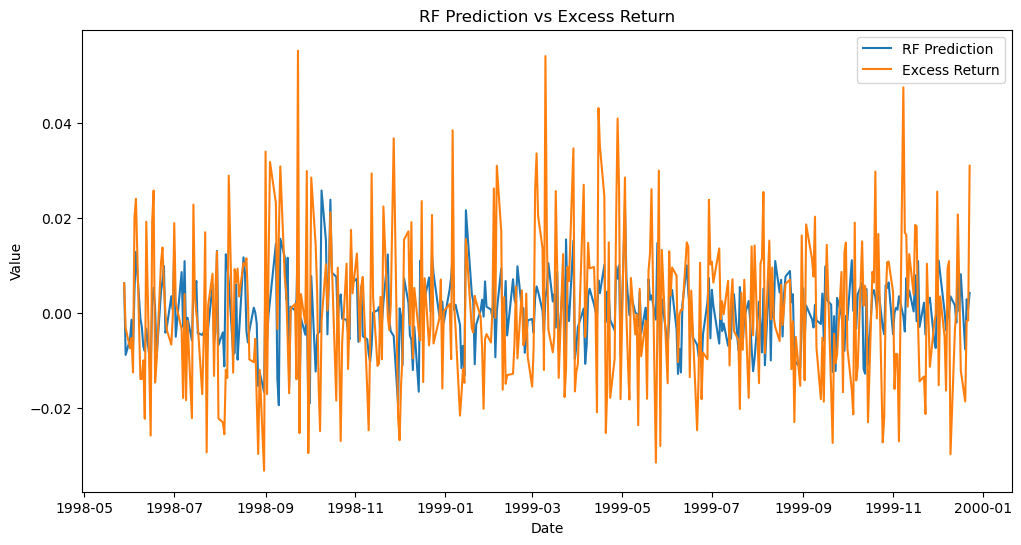

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(rf_pred.index, rf_pred, label='RF Prediction')
plt.plot(matched_df.index, matched_df['excess_ret'], label='Excess Return')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('RF Prediction vs Excess Return')
plt.legend()
plt.show()

In [18]:
matched_df = df_dict['10'].iloc[:500].loc[rf_pred.dropna().index]


In [19]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(matched_df['excess_ret'], rf_pred.dropna())
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0001995546967352723
